# Data analysis: EDA and visualization

#### In this particular notebook the data will be analyzed to study the correlation between weather temperature and test scores by state

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../data/all_in_one.csv')

In [3]:
data.head()

,Unnamed: 0,state,score_sat,participation_%_sat,score_act,participation_%_act,avg_temp
0,0,alabama,1166,6.0,19.1,100.0,24.365982
1,1,alaska,1106,43.0,20.8,33.0,28.894559
2,2,arizona,1149,29.0,19.2,66.0,27.610428
3,3,arkansas,1169,5.0,19.4,100.0,20.094840
4,4,california,1076,60.0,22.7,27.0,23.969720


In [4]:
# Deleting the unwanted column

data.drop(columns=['Unnamed: 0'],inplace =True) 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                50 non-null     object 
 1   score_sat            50 non-null     int64  
 2   participation_%_sat  50 non-null     float64
 3   score_act            50 non-null     float64
 4   participation_%_act  50 non-null     float64
 5   avg_temp             50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


In [8]:
data.shape

(50, 6)

In [9]:
data.describe()

,score_sat,participation_%_sat,score_act,participation_%_act,avg_temp
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1122.880000,44.820000,21.454000,62.320000,18.314655
std,92.845634,37.097604,2.111312,34.114118,5.611421
min,998.000000,2.000000,17.700000,7.000000,9.026965
25%,1062.250000,4.250000,19.925000,27.750000,14.572399
50%,1098.500000,50.000000,21.050000,66.000000,16.549630
75%,1207.000000,74.500000,23.650000,100.000000,22.852888
max,1298.000000,100.000000,25.600000,100.000000,36.123358


### Observations:
#### 1. The mean participation is considerably higher (17.5%) in the ACT.
#### 2. STD is pretty similar, which makes sense because the spread of scores should be similar disregardin the type of test.
#### 3. The maximum and minimum SAT and ACT scores are within their boundries.

#### Next, I check if there are any outliers in the average temperature column (SAT and ACT have been already checked for abnormal data in their data preparation notebooks):

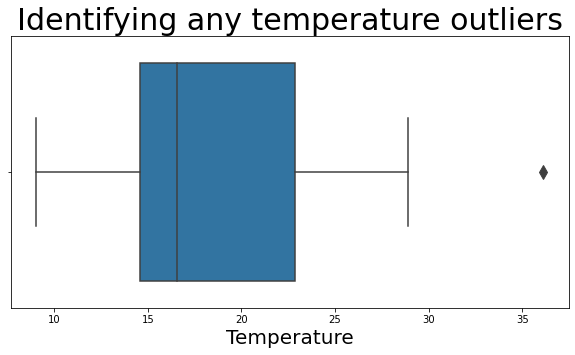

In [10]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(data['avg_temp'], fliersize = 10)
plt.title(label = 'Identifying any temperature outliers', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Temperature', fontdict = {'size': 20}, loc = 'center');

In [11]:
new_data = data

In [12]:
new_data.sort_values('avg_temp', ascending = False).head(1)

,state,score_sat,participation_%_sat,score_act,participation_%_act,avg_temp
18,maine,1013,99.0,24.0,7.0,36.123358


#### The outlier state 'Main' is identified and later removed

In [13]:
i = new_data[new_data.state == 'maine'].index #Looking for the row index

In [14]:
i

Int64Index([18], dtype='int64')

In [15]:
new_data.drop(labels = 18, axis = 0, inplace = True) #Deleting "maine" row

In [18]:
data.shape

(49, 6)

#### Next, correlation between test scores and state temperatures are studied

In [19]:
new_data.corr()

,score_sat,participation_%_sat,score_act,participation_%_act,avg_temp
score_sat,1.000000,-0.770420,-0.376341,0.598675,-0.019780
participation_%_sat,-0.770420,1.000000,0.746531,-0.859521,-0.092106
score_act,-0.376341,0.746531,1.000000,-0.857155,-0.380861
participation_%_act,0.598675,-0.859521,-0.857155,1.000000,0.075502
avg_temp,-0.019780,-0.092106,-0.380861,0.075502,1.000000


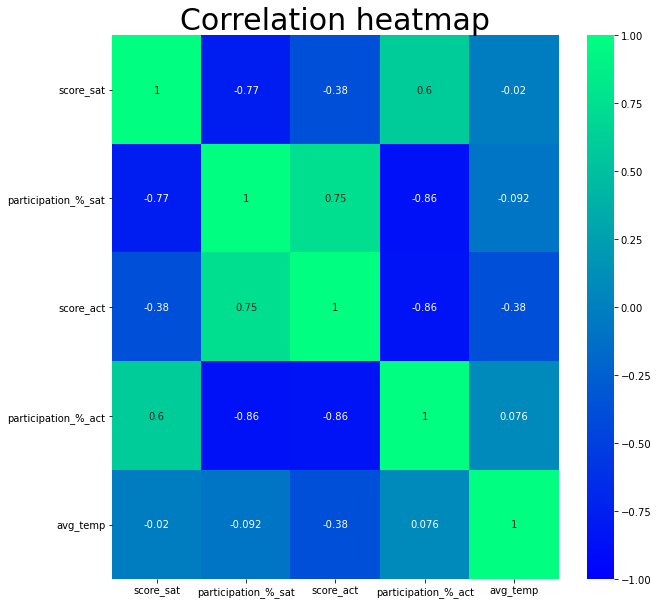

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(new_data.corr(),
            cmap = 'winter',
            annot = True,
           vmin = -1,
           vmax = 1)
plt.yticks(rotation='horizontal')  #This code was taken from: https://stackoverflow.com/questions/11244514/modify-tick-label-text
plt.title(label = 'Correlation heatmap', fontdict = {'size': 30}, loc = 'center');

### Correlation meaning:
#### - Perfect: (+-)1
#### - Strong:(+-) 0.75 to 1
#### - Moderate: (+-) 0.5 to 0.75
#### - Weak: < (+-)0.5

#### The most interesting correlation for this particular projet is the relation between scores and average temperature, as well as participation rates and avergae temperature. These are some interesting insights from this heatmap:
#### - There is very weak correlation between SAT scores and ACT scores
#### - There is a strong negative correlation between participation rate and score for each individual test
#### - There is practically no correlation between the average temperature of states and test scores or participation rates

#### Next, one example of each insight will be displayed:

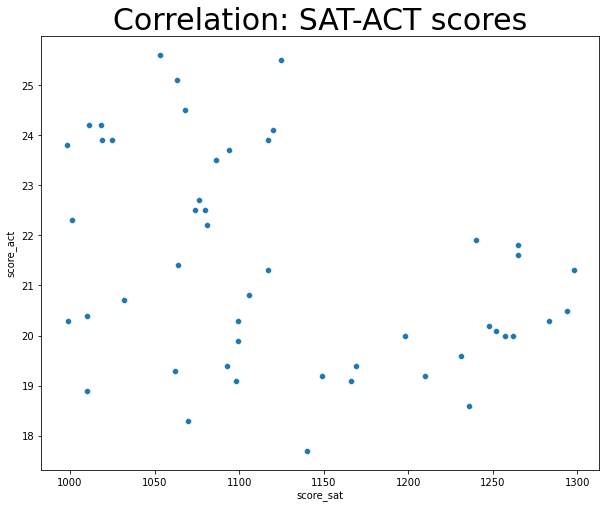

In [21]:
plt.figure(figsize = (10,8))

sns.scatterplot(new_data['score_sat'], new_data['score_act'])
plt.title(label = 'Correlation: SAT-ACT scores', fontdict = {'size': 30}, loc = 'center');

#### There is no clear pattern that shows any clear relation.

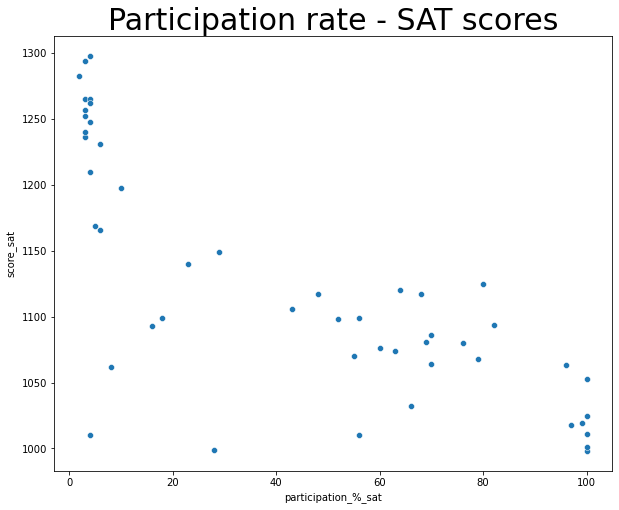

In [22]:
plt.figure(figsize = (10,8))

sns.scatterplot(new_data['participation_%_sat'], new_data['score_sat'])
plt.title(label = 'Participation rate - SAT scores', fontdict = {'size': 30}, loc = 'center');

#### As shown, there is a negative correlation. When participation rates increase, scores decrease

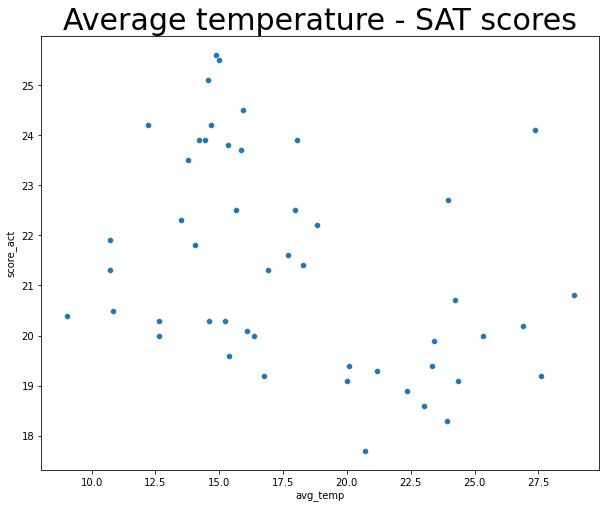

In [23]:
plt.figure(figsize = (10,8))

sns.scatterplot(new_data['avg_temp'], new_data['score_act'])
plt.title(label = 'Average temperature - SAT scores', fontdict = {'size': 30}, loc = 'center');

#### There is no clear pattern that shows any clear relation.

#### 
#### Next, a new dataset with only the states with the top 5 maximum and minimum average temperatures too check if the correlation between that parameter and test scores increases.

In [32]:
data_clean.shape

(39, 6)

In [38]:
data_c = new_data.sort_values('avg_temp', ascending = False).iloc[:5]

In [39]:
data_c

,state,score_sat,participation_%_sat,score_act,participation_%_act,avg_temp
1,alaska,1106,43.0,20.8,33.0,28.894559
2,arizona,1149,29.0,19.2,66.0,27.610428
44,vermont,1120,64.0,24.1,24.0,27.381898
16,kentucky,1248,4.0,20.2,100.0,26.900532
24,missouri,1262,4.0,20.0,100.0,25.339226


In [40]:
data_to_concatenate = new_data.sort_values('avg_temp').iloc[:5]

In [41]:
data_to_concatenate

,state,score_sat,participation_%_sat,score_act,participation_%_act,avg_temp
43,utah,1010,4.0,20.4,100.0,9.026965
22,minnesota,1298,4.0,21.3,99.0,10.711538
40,south_dakota,1240,3.0,21.9,77.0,10.737697
48,wisconsin,1294,3.0,20.5,100.0,10.844362
21,michigan,1011,100.0,24.2,22.0,12.211568


In [43]:
# This code was taken from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
new_set = data_c.append(data_to_concatenate)

In [44]:
new_set

,state,score_sat,participation_%_sat,score_act,participation_%_act,avg_temp
1,alaska,1106,43.0,20.8,33.0,28.894559
2,arizona,1149,29.0,19.2,66.0,27.610428
44,vermont,1120,64.0,24.1,24.0,27.381898
16,kentucky,1248,4.0,20.2,100.0,26.900532
24,missouri,1262,4.0,20.0,100.0,25.339226
43,utah,1010,4.0,20.4,100.0,9.026965
22,minnesota,1298,4.0,21.3,99.0,10.711538
40,south_dakota,1240,3.0,21.9,77.0,10.737697
48,wisconsin,1294,3.0,20.5,100.0,10.844362
21,michigan,1011,100.0,24.2,22.0,12.211568


In [45]:
new_set.shape

(10, 6)

#### Now we study the correlation again

In [46]:
new_set.corr()

,score_sat,participation_%_sat,score_act,participation_%_act,avg_temp
score_sat,1.000000,-0.668691,-0.384378,0.614117,-0.000915
participation_%_sat,-0.668691,1.000000,0.749654,-0.919322,0.178903
score_act,-0.384378,0.749654,1.000000,-0.700861,-0.192424
participation_%_act,0.614117,-0.919322,-0.700861,1.000000,-0.327857
avg_temp,-0.000915,0.178903,-0.192424,-0.327857,1.000000


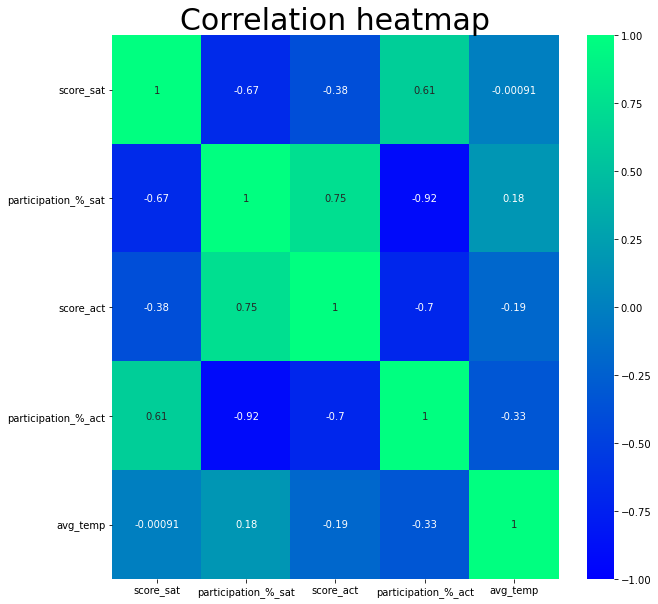

In [47]:
plt.figure(figsize = (10,10))
sns.heatmap(new_set.corr(),
            cmap = 'winter',
            annot = True,
           vmin = -1,
           vmax = 1)
plt.yticks(rotation='horizontal')  #This code was taken from: https://stackoverflow.com/questions/11244514/modify-tick-label-text
plt.title(label = 'Correlation heatmap', fontdict = {'size': 30}, loc = 'center');

#### As shown, this step of narrowing down only the most warm and cold states hasn't given any new or significantly different insight.